In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import griddata
from matplotlib.gridspec import GridSpec

data = dict()

Measures = [6,8,10,11,12,13,14,16,18]
for i in range(0,len(Measures)):
    n = Measures[i]

    #setting all adresses
    Vadress = "Meshdata/VerticesRing" + str(n) +".txt"
    Eadress = "Meshdata/EdgesRing" + str(n) +".txt"
    Fadress = "Meshdata/FacesRing" + str(n) +".txt"
    GaussSol = "Solutions/PoissonGaussSolutionRing" + str(n) + ".txt"
    HarmSol = "Solutions/PoissonHarmSolutionRing" + str(n) + ".txt"
    CubeSol = "Solutions/PoissonCubeSolutionRing" + str(n) + ".txt"

    #loading data in dictionary
    data['V'+str(n)] = np.genfromtxt( Vadress )
    data['E'+str(n)] = np.genfromtxt( Eadress )
    data['F'+str(n)] = np.genfromtxt( Fadress )
    Gauss = np.genfromtxt( GaussSol )
    data['Gauss'+str(n)] = Gauss + 1-Gauss[0]
    Harm = np.genfromtxt( HarmSol )
    data['Harm'+str(n)] = Harm - Harm[0]
    Cube = np.genfromtxt( CubeSol )
    data['Cube'+str(n)] = Cube - Cube[0]

Text(0, 0.5, 'root mean squared error')

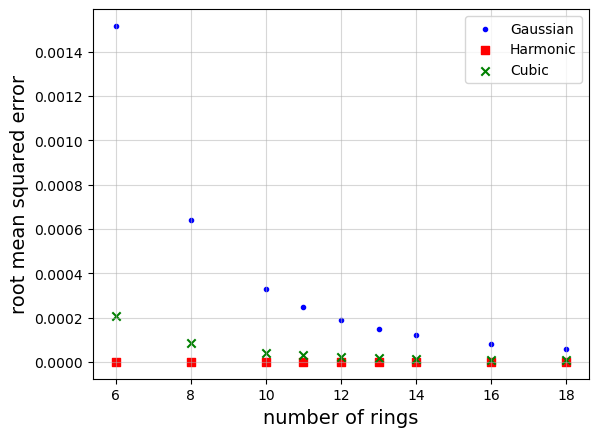

In [10]:
def GaussAnaPot( x,y ):
    r = ((x-0.5)**2 + (y-0.5)**2)**0.5
    Val = math.exp(-10.*r**2)
    return Val

GaussMSD = []

plt.grid(alpha=0.5)
for i in range(0,len(Measures)):
    n = Measures[i]
    V = data['V'+str(n)]
    Sol = data['Gauss'+str(n)]
    SquaredDisplacment = 0

    for j in range(0,len(V)):
        x = V[j][0]
        y = V[j][1]
        SquaredDisplacment += (Sol[j]-GaussAnaPot(x,y))**2

    MSD = math.sqrt(SquaredDisplacment)/(len(V)-1)
    GaussMSD.append( MSD )

plt.scatter(Measures,GaussMSD,marker='.',color='b',label='Gaussian')

def HarmAnaPot( x,y ):
    r = ((x-0.5)**2 + (y-0.5)**2)**0.5
    Val = r**2
    return Val

HarmMSD = []

for i in range(0,len(Measures)):
    n = Measures[i]
    V = data['V'+str(n)]
    Sol = data['Harm'+str(n)]
    SquaredDisplacment = 0

    for j in range(0,len(V)):
        x = V[j][0]
        y = V[j][1]
        SquaredDisplacment += (Sol[j]-HarmAnaPot(x,y))**2

    MSD = math.sqrt(SquaredDisplacment)/(len(V)-1)
    HarmMSD.append( MSD )

plt.scatter(Measures,HarmMSD,marker='s',color='r',label='Harmonic')

def CubeAnaPot( x,y ):
    r = ((x-0.5)**2 + (y-0.5)**2)**0.5
    Val = r**3
    return Val

CubeMSD = []

for i in range(0,len(Measures)):
    n = Measures[i]
    V = data['V'+str(n)]
    Sol = data['Cube'+str(n)]
    SquaredDisplacment = 0

    for j in range(0,len(V)):
        x = V[j][0]
        y = V[j][1]
        SquaredDisplacment += (Sol[j]-CubeAnaPot(x,y))**2

    MSD = math.sqrt(SquaredDisplacment)/(len(V)-1)
    CubeMSD.append( MSD )

plt.scatter(Measures,CubeMSD,marker='x',color='x,label='Cubic')
plt.legend()
plt.xlabel('number of rings',fontsize=14)
plt.ylabel('root mean squared error', fontsize=14)


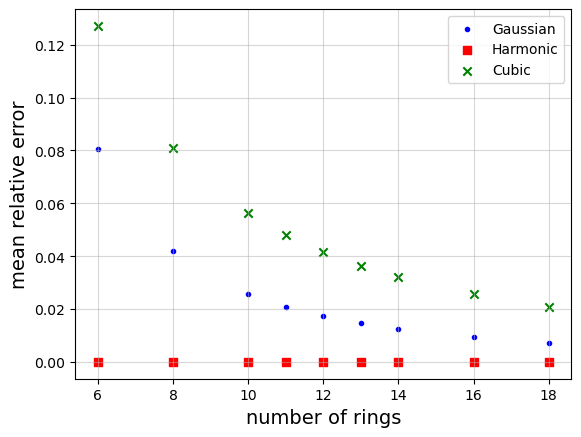

In [12]:
plt.grid(alpha=0.5)

GaussMRE = []

for i in range(0,len(Measures)):
    n = Measures[i]
    V = data['V'+str(n)]
    Sol = data['Gauss'+str(n)]
    Sum = 0


    for j in range(0,len(V)):
        x = V[j][0]
        y = V[j][1]
        Sum += (Sol[j]-GaussAnaPot(x,y))/(GaussAnaPot(x,y))

    MRE = abs(Sum)/(len(V)-1)
    GaussMRE.append( MRE )

plt.scatter(Measures,GaussMRE,marker='.',color='b',label='Gaussian')

#plt.show()
#plt.grid(alpha=0.5)    

HarmMRE = []

for i in range(0,len(Measures)):
    n = Measures[i]
    V = data['V'+str(n)]
    Sol = data['Harm'+str(n)]
    Sum = 0

    for j in range(1,len(V)):
        x = V[j][0]
        y = V[j][1]
        Sum += (Sol[j]-HarmAnaPot(x,y))/(HarmAnaPot(x,y))

    MRE = abs(Sum)/(len(V)-1)
    HarmMRE.append(MRE)

plt.scatter(Measures,HarmMRE,marker='s',color='r',label='Harmonic')

CubeMRE = []

for i in range(0,len(Measures)):
    n = Measures[i]
    V = data['V'+str(n)]
    Sol = data['Cube'+str(n)]
    Sum = 0

    for j in range(1,len(V)):
        x = V[j][0]
        y = V[j][1]
        Sum += (Sol[j]-CubeAnaPot(x,y))/(CubeAnaPot(x,y))

    MRE = abs(Sum)/(len(V)-1)
    CubeMRE.append(MRE)

plt.scatter(Measures,CubeMRE,marker='x',color='g',label='Cubic')

plt.xlabel('number of rings',fontsize=14)
plt.ylabel('mean relative error', fontsize=14)
plt.legend()
